# ANALISIS DATA

## Import library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

## Read data

In [80]:
# Membaca file JSON (Sesuaikan path dengan struktur JSON-mu)
df = pd.read_json("../../data/processed/data_preprocessed.json")

## A. Menggunakan Pandas untuk analisis statistik dasar

In [81]:
# Menampilkan informasi dasar dataset
print(df.info())

print("===============================")
print(df.describe(include="all"))

print("===============================")
print("Statistik jumlah kata per teks")
print(df['title'].apply(lambda x: len(x.split())).describe())  # Statistik jumlah kata per teks

print("===============================")
print("Statistik panjang karakter per teks")
print(df['title'].apply(lambda x: len(x)).describe())  # Statistik panjang karakter per teks


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      9722 non-null   object        
 1   author     9678 non-null   object        
 2   publisher  9169 non-null   object        
 3   date       0 non-null      datetime64[ns]
 4   abstract   8527 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 379.9+ KB
None
                            title  author                           publisher  \
count                        9722    9678                                9169   
unique                       9601    8041                                 371   
top     essay financial economics  aaij r  massachusetts institute technology   
freq                            5      64                                4655   
mean                          NaN     NaN                                 NaN   
min          

## B. Visualisasikan distribusi kata dengan Matplotlib dan WordCloud

In [82]:
# Menggabungkan semua teks menjadi satu
all_text = " ".join(df["title"].dropna())

# Menghitung frekuensi kata
words = all_text.split()
word_counts = Counter(words)

### 1. Wordcloud untuk data yang belum melalui TF-IDF

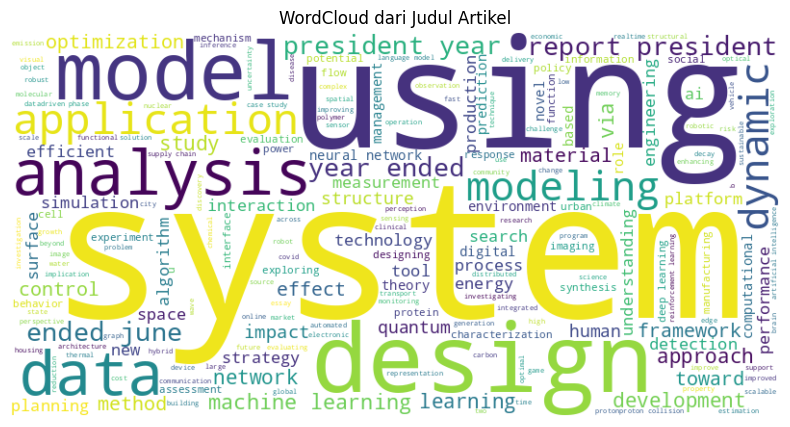

In [83]:
# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dari Judul Artikel")
plt.show()

### 2. Wordcloud untuk data setelah melalui TF-IDF

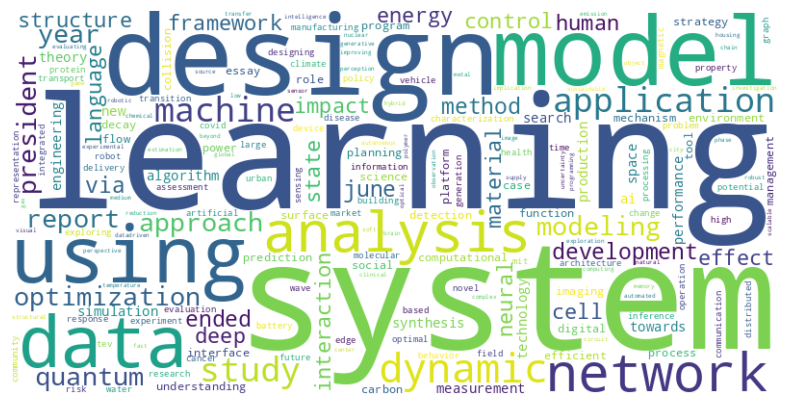

In [ ]:
documents = df["title"].dropna().tolist()

# Buat model TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Ambil 1000 kata dengan bobot tertinggi
tfidf_matrix = vectorizer.fit_transform(documents)

# Ambil skor TF-IDF untuk setiap kata
tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))

# Buat WordCloud berdasarkan bobot TF-IDF
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tfidf_scores)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 3. Visualisasi Histogram Jumlah Kata per Judul

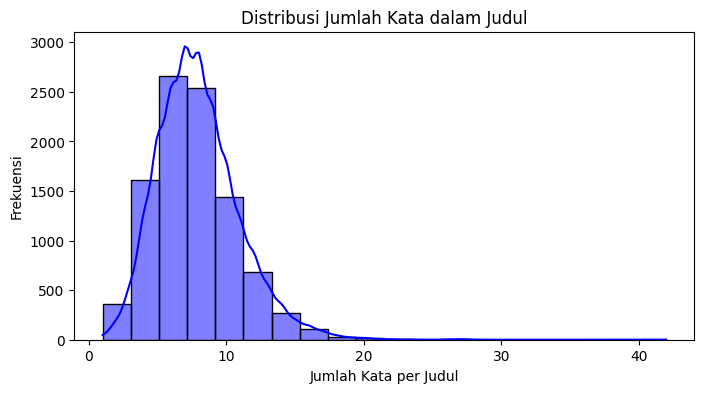

In [85]:
plt.figure(figsize=(8, 4))
sns.histplot(df['title'].apply(lambda x: len(x.split())), bins=20, kde=True, color='blue')
plt.xlabel("Jumlah Kata per Judul")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Kata dalam Judul")
plt.show()

## 4. Visualisasi Histogram Panjang Karakter per Judul

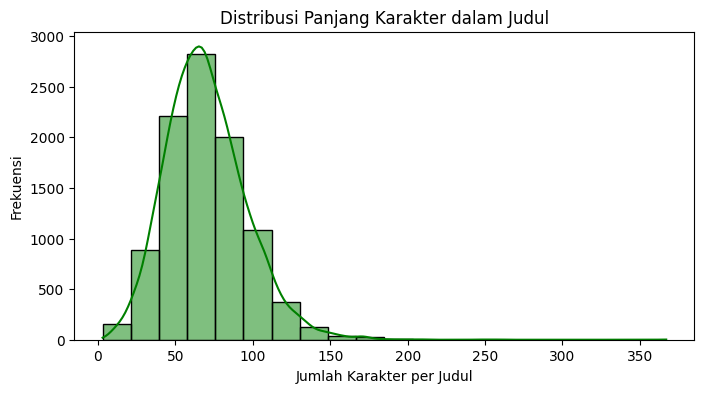

In [86]:
plt.figure(figsize=(8, 4))
sns.histplot(df['title'].apply(lambda x: len(x)), bins=20, kde=True, color='green')
plt.xlabel("Jumlah Karakter per Judul")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Karakter dalam Judul")
plt.show()

## 5. Visualisasi 10 Kata Paling Sering Muncul

/tmp/ipykernel_27258/1452747382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


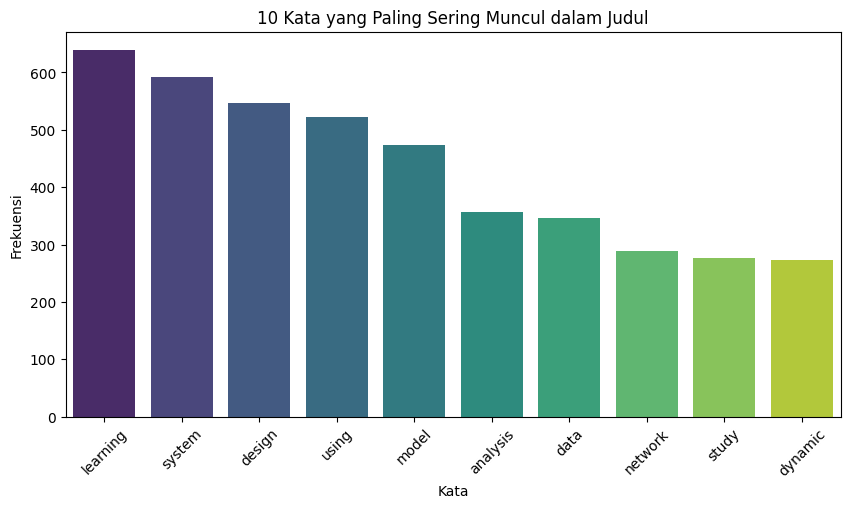

In [87]:
# 10 Kata yang Paling Sering Muncul
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("10 Kata yang Paling Sering Muncul dalam Judul")
plt.xticks(rotation=45)
plt.show()